In [1]:
#The os module in python provides functions for interacting with the operating system
import os
# importing Numpy module in order to create numpy array 
import numpy as np
#pylab is a convenience module that bulk imports matplotlib and * means import all the functionality of that module 
from pylab import *
#pyplot is matplotlib's plotting framework. That specific import line merely imports the module "matplotlib.pyplot" and binds that to the name "plt"
import matplotlib.pyplot as plt

import nibabel as nib
#pydicom is a pure Python package for working with DICOM files such as medical images, reports, and radiotherapy objects.
import pydicom


from nibabel.testing import data_path

#tkinter in your namespace and import Tkinter as tk does the same, but "renames" it locally to 'tk' to save you typing.
import tkinter
"""The tkinter.filedialog module provides classes and factory functions for creating some classes and functions provide file dialog windows that combine a ... class that is the base class for dialogs defined in other supporting modules"""
from tkinter import filedialog
"""The Scipy.io package provides a wide range of functions to work around with different format of files. Some of these formats are """
import scipy.io as sio
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.layers import UpSampling2D
from keras.layers import Conv2DTranspose,Concatenate
#from tensorflow.keras.layers import 
import cv2

In [2]:
root=tkinter.Tk()
root.withdraw()
currdir=os.getcwd()

#### Read the files from the directory

In [3]:
#select no
tempdir= filedialog.askdirectory(parent=root,initialdir='/Users/suskshigowda/Downloads/Brain tumor classification/Brain tumor dataset')
file=os.listdir(tempdir)
print(len(file))
tempdir

98


'/Users/suskshigowda/Downloads/Brain tumor classification/Brain tumor dataset/no'

#### Array of label 0(No Tumor)

In [4]:
brain_no = np.zeros((len(file),256,256,1))     # image size(256,256) ,greyscale
for i in range(0,len(file)):
    img=cv2.imread(os.path.join(tempdir,file[i]))
    temp = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    var=cv2.resize(temp,(256,256))
    brain_no[i,:,:,0] = var

In [5]:
#select yes 

tempdir= filedialog.askdirectory(parent=root,initialdir='/Users/suskshigowda/Downloads/Brain tumor classification/Brain tumor dataset')
file=os.listdir(tempdir)
print(len(file))
tempdir

155


'/Users/suskshigowda/Downloads/Brain tumor classification/Brain tumor dataset/yes'

#### Array of label 1 (Tumor)

In [6]:
brain_yes = np.zeros((len(file),256,256,1))
for i in range(0,len(file)):
    img=cv2.imread(os.path.join(tempdir,file[i]))
    temp = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    var=cv2.resize(temp,(256,256))
    brain_yes[i,:,:,0] = var

#### Concatenate into a single input array of images

In [7]:
print(np.shape(brain_no),np.shape(brain_yes))
brain_img=np.concatenate((brain_no,brain_yes))
print(np.shape(brain_img))

(98, 256, 256, 1) (155, 256, 256, 1)
(253, 256, 256, 1)


#### Labels (0 and 1)

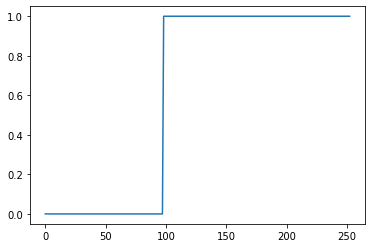

In [8]:
y=np.zeros((253,1))
y[98:253]=1
indn=np.where(y==0)
indy=np.where(y==1)
plt.plot(y)

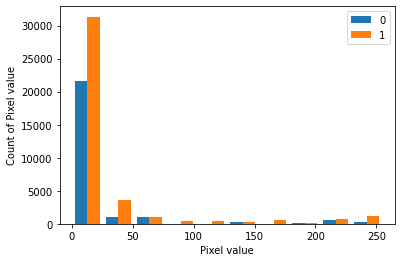

In [9]:
data=[brain_img[indn].flatten(),brain_img[indy].flatten()]
#plt.hist([brain_img[indn],brain_img[indy]])
plt.hist(data)
labels=['0','1']
plt.legend(labels)
plt.xlabel('Pixel value')
plt.ylabel('Count of Pixel value')
plt.show()

#### Define the CNN model

In [10]:
model_b=models.Sequential()

#convolution layers
model_b.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,1)))
model_b.add(layers.Conv2D(32,(3,3),activation='relu'))
model_b.add(layers.MaxPooling2D((2,2)))                     
model_b.add(layers.Conv2D(64,(3,3),activation='relu'))
model_b.add(layers.Conv2D(64,(3,3),activation='relu'))
model_b.add(layers.MaxPooling2D((2,2)))


##dense layers
model_b.add(layers.Flatten())
model_b.add(layers.Dense(128,activation='relu'))
#model.add(layers.Dropout(0.5))

model_b.add(layers.Dense(1,activation='sigmoid'))

#### Compile and fit

In [11]:
model_b.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
model_b.fit(brain_img,y,epochs=5)

Epoch 1/5
8/8 [==============================] - 87s 11s/step - loss: 267.0491 - accuracy: 0.4941
Epoch 2/5
8/8 [==============================] - 81s 10s/step - loss: 6.0048 - accuracy: 0.7470
Epoch 3/5
8/8 [==============================] - 78s 10s/step - loss: 0.5218 - accuracy: 0.7866
Epoch 4/5
8/8 [==============================] - 79s 10s/step - loss: 0.4011 - accuracy: 0.8261
Epoch 5/5
8/8 [==============================] - 84s 10s/step - loss: 0.3061 - accuracy: 0.8617


#### Test on the trained dataset

In [20]:
num=20
imgg=brain_img[num]
#print(np.shape(imgg))
test_img=np.reshape(imgg,(1,256,256,1))
#np.shape(test_img)
result=model_b.predict_classes(test_img)
#plt.imshow(imgg)
#plt.colorbar()
print("\n")
print('The actual class is',y[num])
print('The predicted class is',result)



The actual class is [0.]
The predicted class is [[0]]


#### Test on the external data 

(225, 225)
(256, 256)


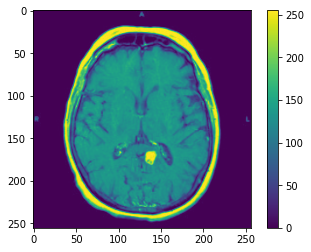

In [23]:
filepath='/Users/suskshigowda/Downloads/Brain tumor classification/Brain tumor dataset/no/N15.jpg'
img=np.squeeze(np.array(imread(filepath)))
print(np.shape(img))
plt.imshow(img)
imgg = cv2.resize(img,(256,256))
#imgg=cv2.cvtColor(imgg,cv2.COLOR_BGR2GRAY)
plt.imshow(imgg)
plt.colorbar()
print(np.shape(imgg))

In [16]:
test_img=np.reshape(imgg,(1,256,256,1))
result1=model_b.predict_classes(test_img)
print('The predicted class is',result1)

The predicted class is [[1]]


In [17]:
yhat=np.zeros((len(brain_img),1))
for j in range(len(brain_img)):
    num=j
    imgg=brain_img[num]
    #print(np.shape(imgg))
    test_img=np.reshape(imgg,(1,256,256,1))
    result=model_b.predict_classes(test_img)
    yhat[j][0]=result

id1=np.where(yhat==0)
id2=np.where(yhat==1)
print(len(id1[0]),len(id2[0]))

91 162


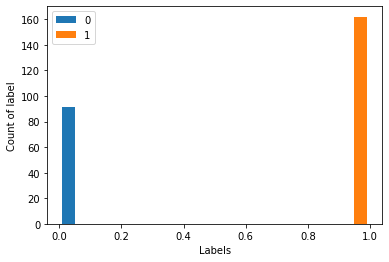

In [18]:
plt.hist([yhat[id1],yhat[id2]])
labels=['0','1']
plt.xlabel('Labels')
plt.ylabel('Count of label')
plt.legend(labels)
plt.show()